In [53]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import numpy as np
import pathlib
import matplotlib.pyplot as plt
import os
from PIL import Image
from itertools import islice
from mlxtend.plotting import plot_decision_regions

# Tensors

##### Creation

In [3]:
np.set_printoptions(precision=3)

# can create tensor from python list
a = [1, 2, 3]
tensor_a = torch.tensor(a)
print(tensor_a)

# or create from np arrays
b = np.array([4, 5, 6], dtype=np.int32)
tensor_b = torch.from_numpy(b)
print(tensor_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [4]:
# can create from PyTorch as well
tensor_ones = torch.ones(2, 3)
print(tensor_ones.shape)
print(tensor_ones)

# or andom value
tensor_rand = torch.rand(2, 3)
print(tensor_rand)

torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.0488, 0.6118, 0.7862],
        [0.5715, 0.0692, 0.5447]])


##### Data type and shape

In [5]:
# can convert data type of tensor
tensor_a_int64 = tensor_a.to(torch.int64)
print(tensor_a_int64.dtype)

torch.int64


In [6]:
# transpose tensor
tensor_rand_transpose = torch.transpose(tensor_rand, 0, 1)
print(tensor_rand.shape, '--> ', tensor_rand_transpose.shape)

torch.Size([2, 3]) -->  torch.Size([3, 2])


In [7]:
# reshape tensor (1D to 2D)
t = torch.zeros(30)
t_reshape = t.reshape(5, 6)
print(t_reshape.shape)

torch.Size([5, 6])


In [8]:
# remove dimensions with 1 by squeezing
t = torch.zeros(1, 2, 2, 4, 1, 3)
t_sqz = torch.squeeze(t, 4)
print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 2, 4, 1, 3])  -->  torch.Size([1, 2, 2, 4, 3])


##### Math Ops

In [9]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1                   # uniform distribution between (-1, 1)
t2 = torch.normal(mean=0, std=1, size=(5, 2))   # standard normal distribution
print(t1)
print(t2)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])


In [10]:
# element-wise product
t3 = torch.multiply(t1, t2)
t3

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])

In [11]:
# mean, sum, or std on an axis
t4 = torch.mean(t1, axis=0)
t4

tensor([-0.1373,  0.2028])

In [12]:
# matrix product = t1 x t2^T
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
t5

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])

In [13]:
# compute L^n norm
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
norm_t1

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])

##### Split, stack, concat

In [14]:
torch.manual_seed(1)
t = torch.rand(6)
print(t)

# split into 3 tensors
t_splits = torch.chunk(t, 3)
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [15]:
torch.manual_seed(1)
t = torch.rand(5)
print(t)

# specify the splits
t_splits = torch.split(t, split_size_or_sections=[3, 2])
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

In [16]:
# concat 1D, 1D to 1D
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], axis=0)
C

tensor([1., 1., 1., 0., 0.])

In [17]:
# stack 1D, 1D to 2D
A = torch.ones(3)
B = torch.zeros(3)
C = torch.stack([A, B], axis=1)
C

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])

# Dataset and DataLoader

##### DataLoader

In [18]:
# DataLoader is a useful class for managing, batching, and retrieving data
# if data is already as a tensor, python list, or numpy array, can create the DataLoader() object easily
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

# DataLoader enables getting batches of data from it iteratively
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [19]:
# can also specify batch size when creating DataLoader
data_loader = DataLoader(t, batch_size=3)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


In [20]:
# often we might need to merge tensors into a dataset, e.g. one tensor for features, one for label, merged into one dataset
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

joint_dataset = TensorDataset(t_x, t_y)

##### Shuffle, batch, iterate

In [21]:
torch.manual_seed(1)

# DataLoader() object can also create from Dataset object
# specify batch and shuffle when creating the DataLoader
data_loader = DataLoader(dataset= joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', 'x:', batch[0], '\n         y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])


In [22]:
# DataLoader object automatically iterate the whole dataset over the epochs, creating different batch samples
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], '\n         y:', batch[1])

epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([0, 1])


##### Datasets

['..\\data\\cat_dog_images\\cat-01.jpg', '..\\data\\cat_dog_images\\cat-02.jpg', '..\\data\\cat_dog_images\\cat-03.jpg', '..\\data\\cat_dog_images\\dog-01.jpg', '..\\data\\cat_dog_images\\dog-02.jpg', '..\\data\\cat_dog_images\\dog-03.jpg']


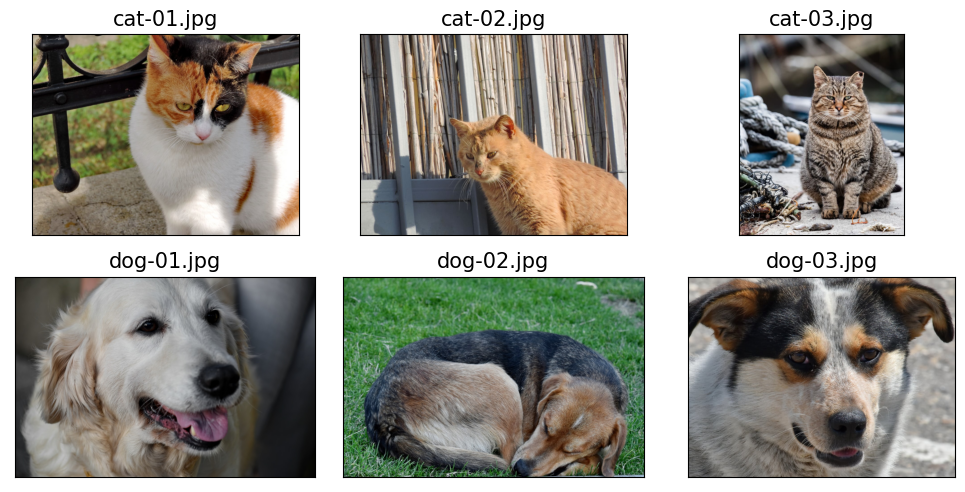

In [23]:
# get all file names of the data
imgdir_path = pathlib.Path('../data/cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

# plot
fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

In [24]:
# assign label to data
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]

In [25]:
# create a custom Dataset class from the PyTorch Dataset class, containing the filenames and labels
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform

    # Dataset class function that returns a sample (feature, label)
    def __getitem__(self, index):
        # get the image
        img = Image.open(self.file_list[index])
        
        # resize the image
        if self.transform is not None:
            img = self.transform(img)

        label = self.labels[index]
        return img, label

    # Dataset class function that returns number of samples in the dataset
    def __len__(self):
        return len(self.labels)

# Pytorch transform object that transforms an image (to tensor and resize)
img_height, img_width = 80, 120
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((img_height, img_width))])

image_dataset = ImageDataset(file_list, labels, transform)

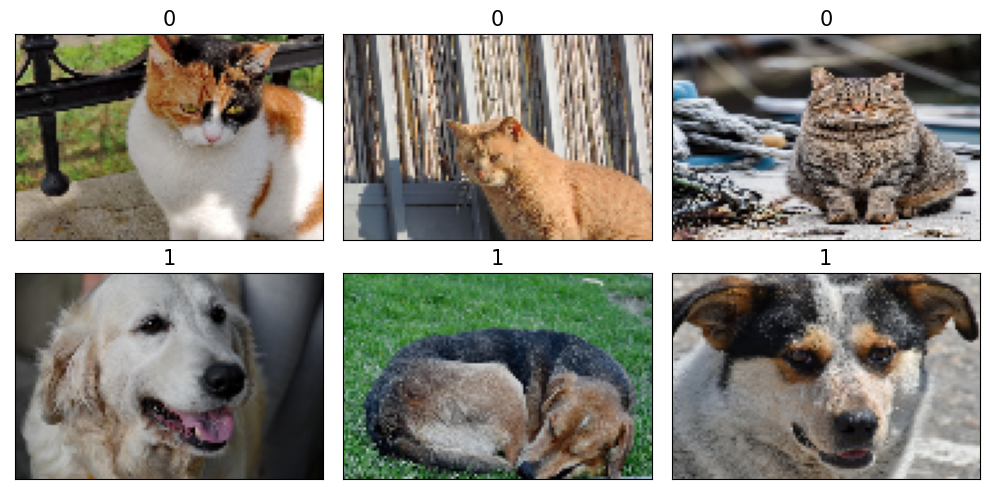

In [26]:
# plot the image dataset
fig = plt.figure(figsize=(10, 5))
for i, sample in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(sample[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{sample[1]}', size=15)
plt.tight_layout()
plt.show()

##### Torchvision datasets

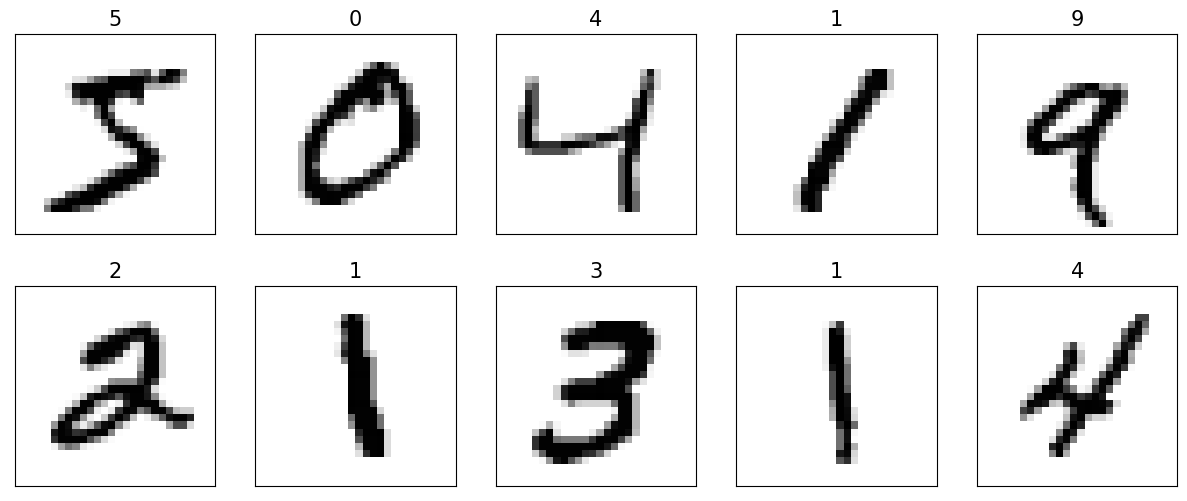

In [27]:
dataset_path = '../data/'

# download data from torchvision
mnist_dataset = torchvision.datasets.MNIST(dataset_path, 'train', download=True)
assert isinstance(mnist_dataset, torch.utils.data.Dataset)

# plot
fig = plt.figure(figsize=(15, 6))
for i, (image, label) in  islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)
plt.show()

# Neural Network

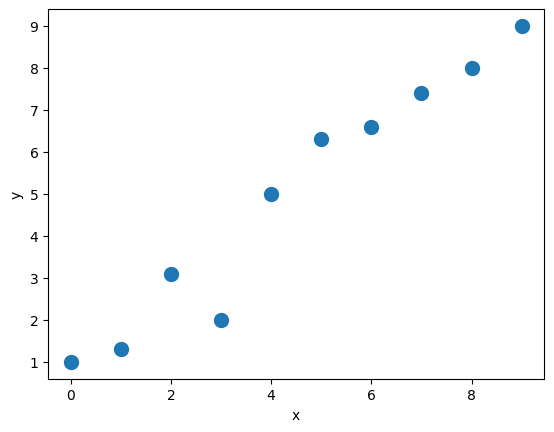

In [28]:
# create sample dataset
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 
                    6.3, 6.6,7.4, 8.0,
                    9.0], dtype='float32')
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [29]:
# standardize data
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)

# convert to tensor
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)

# create dataset and dataloader
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [30]:
# MSE cost function
cost_fn = nn.MSELoss(reduction='mean')

input_size = 1
output_size = 1
learning_rate = 0.001

# simple one layer linear regression model
model = nn.Linear(input_size, output_size)

# SGD optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [31]:
# train
num_epochs = 200
log_epoch = 10
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # forward predict
        pred = model(x_batch)[:, 0]

        # calculate error
        loss = cost_fn(pred, y_batch)

        # backward calculate gradient
        loss.backward()

        # update parameters using gradient
        optimizer.step()

        # reset gradients to 0
        optimizer.zero_grad()

    if epoch % log_epoch == 0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 14.0997
Epoch 10  Loss 50.1206
Epoch 20  Loss 24.4787
Epoch 30  Loss 10.0391
Epoch 40  Loss 11.5713
Epoch 50  Loss 0.2848
Epoch 60  Loss 5.1079
Epoch 70  Loss 5.0783
Epoch 80  Loss 4.0022
Epoch 90  Loss 0.3009
Epoch 100  Loss 0.9765
Epoch 110  Loss 0.0101
Epoch 120  Loss 0.3501
Epoch 130  Loss 0.5320
Epoch 140  Loss 0.1065
Epoch 150  Loss 0.2883
Epoch 160  Loss 0.3843
Epoch 170  Loss 0.1860
Epoch 180  Loss 0.3319
Epoch 190  Loss 0.0081


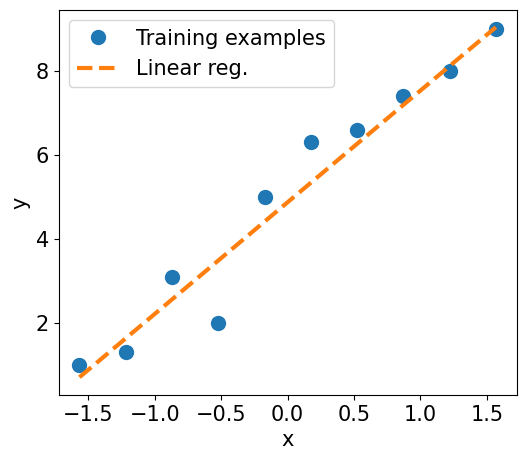

In [32]:
# plot linear model prediction
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

##### MLP

In [33]:
# load data
iris = load_iris()
X = iris['data']
y = iris['target']

# train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1./3, random_state=1, stratify=y)

# standardize data
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)

# convert to tensor
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

# create dataset and dataloader
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [34]:
# generic linear layers MLP NN model
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()

        # 2 layers, 1st is input to hidden (hidden layer), 2nd is hidden to output (output layer)
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # layer 1 calculations (wx + b)
        x = self.layer1(x)
        # layer 1 activation
        x = nn.Sigmoid()(x)
        # layer 2 calculations (wx + b)
        x = self.layer2(x)
        # layer 2 activation, softmax for classification
        x = nn.Softmax(dim=1)(x)
        return x

# number of features
input_size = X_train_norm.shape[1]
# 16 hidden units
hidden_size = 16
# 3 classes
output_size = 3

model = MLPModel(input_size, hidden_size, output_size)

In [35]:
# training parameters
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# track epoch accuracies
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):
    for X_batch, y_batch in train_dl:
        # forward predict
        pred = model(X_batch)

        # calculate error
        loss = loss_fn(pred, y_batch.long())

        # backward calculate gradient
        loss.backward()

        # update parameters using gradient
        optimizer.step()

        # reset gradients to 0
        optimizer.zero_grad()

        # track epoch error
        loss_hist[epoch] += loss.item() * y_batch.size(0)

        # track epoch accuracy
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()

    # calculate average for this epoch
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

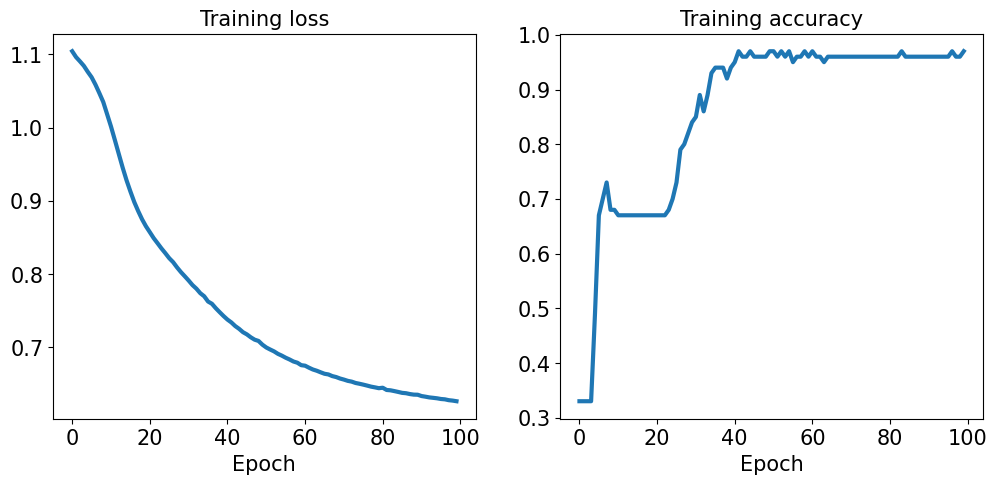

In [36]:
# plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [37]:
# standardize data
X_test_norm = (X_test - np.mean(X_test)) / np.std(X_test)

# convert to tensor
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)

# predict on test set
pred_test = model(X_test_norm)

# accuracy
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9600


##### Save and restore

In [38]:
# save both the model architecture and weights, usually in pt or pth format
path = '../saved_models/iris_classifier.pt'
torch.save(model, path)

In [39]:
# restore model architecture and weights
model_new = torch.load(path)
model_new.eval()

MLPModel(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [40]:
# restored model is the same
pred_test = model_new(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9600


In [41]:
# can also save weights only
path = '../saved_models/iris_classifier_state.pt'
torch.save(model.state_dict(), path)

# need to construct the model again, and restore the weights
model_new = MLPModel(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))

<All keys matched successfully>

# XOR Classification (practical example)

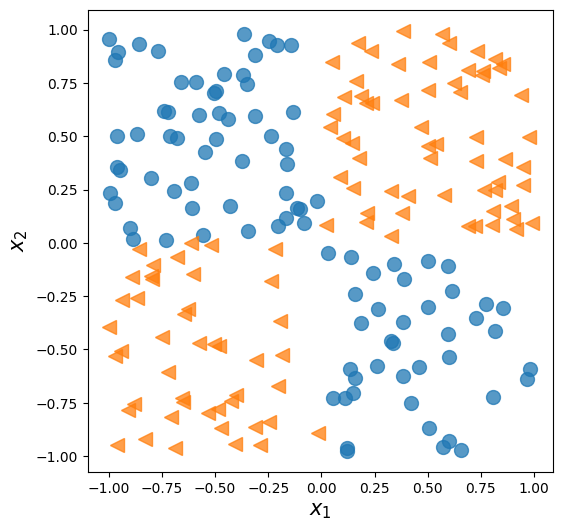

In [42]:
# XOR classifcation is a classic problem for testing a model's ability to learn nonlinear decision boundary

# create random sample (from uniform distribution) with 2 features in the range (-1, 1)
torch.manual_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))

# assign xor label
y = np.ones(len(x))
y[x[:, 0] * x[:, 1] < 0] = 0

# split train val set
num_train = 100
x_train = torch.tensor(x[:num_train, :], dtype=torch.float32)
x_valid = torch.tensor(x[num_train:, :], dtype=torch.float32)
y_train = torch.tensor(y[:num_train], dtype=torch.float32)
y_valid = torch.tensor(y[num_train:], dtype=torch.float32)

# plot the data
fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In [43]:
# create dataset and dataloader
train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

##### PyTorch sequential model building

In [44]:
# usually, it's better to start with a simple one layer network
model = nn.Sequential(
    nn.Linear(2, 1),  # 2 feature input, 1 output (binary classification)
    nn.Sigmoid()
)

model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [45]:
# cost function and optimization
loss_fn = nn.BCELoss()  # binary cross-entropy
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [46]:
# train

torch.manual_seed(1)
num_epochs = 200

def train(model, num_epochs, train_dl, x_valid, y_valid):
    # track metrics of epochs
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_val = [0] * num_epochs
    accuracy_hist_val = [0] * num_epochs

    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            # forward predict
            pred = model(x_batch)[:, 0]

            # calculate error
            loss = loss_fn(pred, y_batch)

            # backward calculate gradient
            loss.backward()

            # update parameters using gradient
            optimizer.step()

            # reset gradients to 0
            optimizer.zero_grad()

            # track epoch error
            loss_hist_train[epoch] += loss.item()

            # track epoch accuracy
            is_correct = ((pred >= 0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()

        # calculate average training metric for this epoch
        loss_hist_train[epoch] /= len(train_dl)
        accuracy_hist_train[epoch] /= len(train_dl)

        # evaluate on the validation set
        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_val[epoch] = loss.item()
        is_correct = ((pred >= 0.5).float() == y_valid).float()
        accuracy_hist_val[epoch] = is_correct.mean()

    return loss_hist_train, loss_hist_val, accuracy_hist_train, accuracy_hist_val

history = train(model, num_epochs, train_dl, x_valid, y_valid)

Text(0.5, 0, 'Epochs')

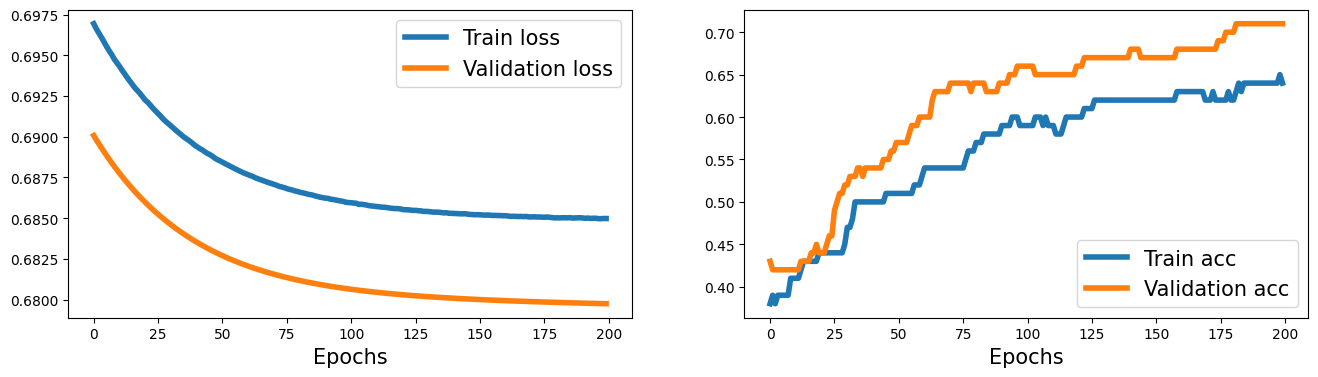

In [47]:
# plot train and val result
fig = plt.figure(figsize=(16, 4))
# plot error
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
# plot accuracy
ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc', 'Validation acc'], fontsize=15)
ax.set_xlabel('Epochs', size=15)



In [48]:
# train a model with more depth
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

# cost function and optimization
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

history = train(model, num_epochs, train_dl, x_valid, y_valid)

Text(0.5, 0, 'Epochs')

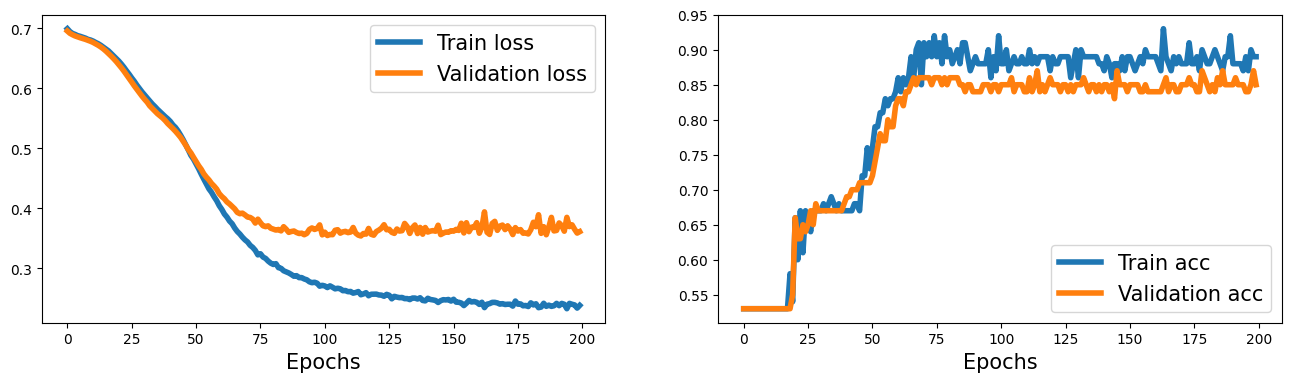

In [49]:
fig = plt.figure(figsize=(16, 4))
# plot error
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
# plot accuracy
ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc', 'Validation acc'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

##### nn.Module custom module

In [59]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()

        # define layers
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4, 1)
        a3 = nn.Sigmoid()

        # create a pytorch module list
        layers_list = [l1, a1, l2, a2, l3, a3]
        self.module_list = nn.ModuleList(layers_list)

    def forward(self, x):
        # fully connected module, just connect
        for f in self.module_list:
            x = f(x)
        return x

    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred >= 0.5).float()

model = MyModule()
model

MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [60]:
# cost and optimizer
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

# train
history = train(model, num_epochs, train_dl, x_valid, y_valid)

C:\Users\kevin\AppData\Local\Temp\ipykernel_12724\609321293.py:14: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid.numpy(), y=y_valid.numpy().astype(np.integer),clf=model)


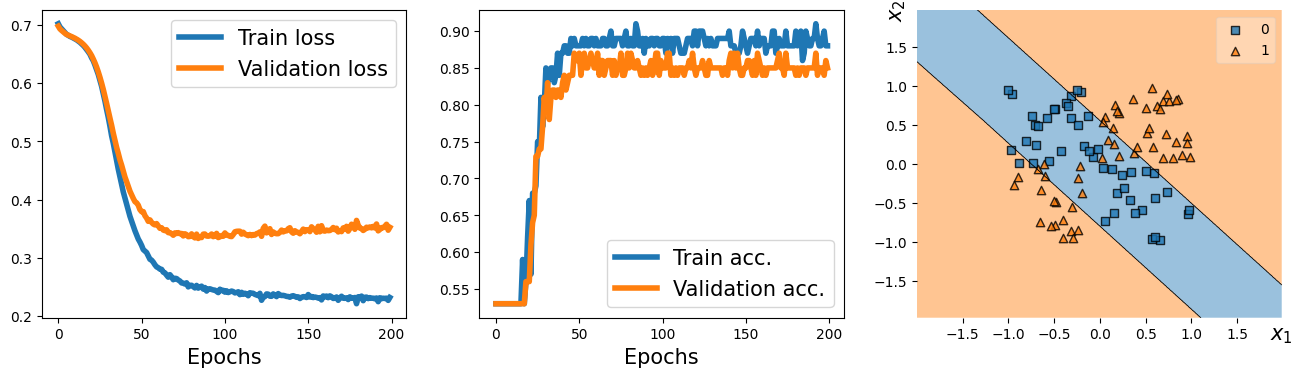

In [61]:
# plot
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(), y=y_valid.numpy().astype(np.integer),clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [66]:
# can create custom layer by inheriting from nn.Module

# noisy linear layer by adding a noise n variable, w(x+n)+b
class NoisyLinear(nn.Module):
    def __init__(self, input_size, output_size, noise_stddev=0.1):
        super().__init__()

        # define weight tensor
        w = torch.Tensor(input_size, output_size)
        self.w = nn.Parameter(w)  # declare that w is a tensor that is the module's parameter
        # init weight values, this is a popular init method
        nn.init.xavier_uniform_(self.w)

        # define bias tensor, init to 0
        b = torch.Tensor(output_size).fill_(0)
        self.b = nn.Parameter(b)

        self.noise_stddev = noise_stddev

    def forward(self, x, training=False):
        if training:
            # if training, add noise
            noise = torch.normal(0.0, self.noise_stddev, x.shape)
            x_new = torch.add(x, noise)
        else:
            x_new = x

        # w(x+n)+b
        return torch.add(torch.mm(x_new, self.w), self.b)

In [76]:
# use the custom layer in a model
class MyNoisyModule(nn.Module):
    def __init__(self):
        super().__init__()

        # define layers
        self.l1 = NoisyLinear(2, 4, 0.07)
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear(4, 4)
        self.a2 = nn.ReLU()
        self.l3 = nn.Linear(4, 1)
        self.a3 = nn.Sigmoid()

    def forward(self, x, training=False):
        x = self.l1(x, training)
        x = self.a1(x)
        x = self.l2(x)
        x = self.a2(x)
        x = self.l3(x)
        x = self.a3(x)
        return x

    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred >= 0.5).float()

torch.manual_seed(1)
model = MyNoisyModule()
model

MyNoisyModule(
  (l1): NoisyLinear()
  (a1): ReLU()
  (l2): Linear(in_features=4, out_features=4, bias=True)
  (a2): ReLU()
  (l3): Linear(in_features=4, out_features=1, bias=True)
  (a3): Sigmoid()
)

In [77]:
# cost and optimizer
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

torch.manual_seed(1)

loss_hist_train = [0] * num_epochs
accuracy_hist_train = [0] * num_epochs
loss_hist_val = [0] * num_epochs
accuracy_hist_val = [0] * num_epochs

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # forward predict
        pred = model(x_batch, True)[:, 0]

        # calculate error
        loss = loss_fn(pred, y_batch)

        # backward calculate gradient
        loss.backward()

        # update parameters using gradient
        optimizer.step()

        # reset gradients to 0
        optimizer.zero_grad()

        # track epoch error
        loss_hist_train[epoch] += loss.item()

        # track epoch accuracy
        is_correct = ((pred >= 0.5).float() == y_batch).float()
        accuracy_hist_train[epoch] += is_correct.mean()

    # calculate average training metric for this epoch
    loss_hist_train[epoch] /= len(train_dl)
    accuracy_hist_train[epoch] /= len(train_dl)

    # evaluate on the validation set
    pred = model(x_valid)[:, 0]
    loss = loss_fn(pred, y_valid)
    loss_hist_val[epoch] = loss.item()
    is_correct = ((pred >= 0.5).float() == y_valid).float()
    accuracy_hist_val[epoch] = is_correct.mean()

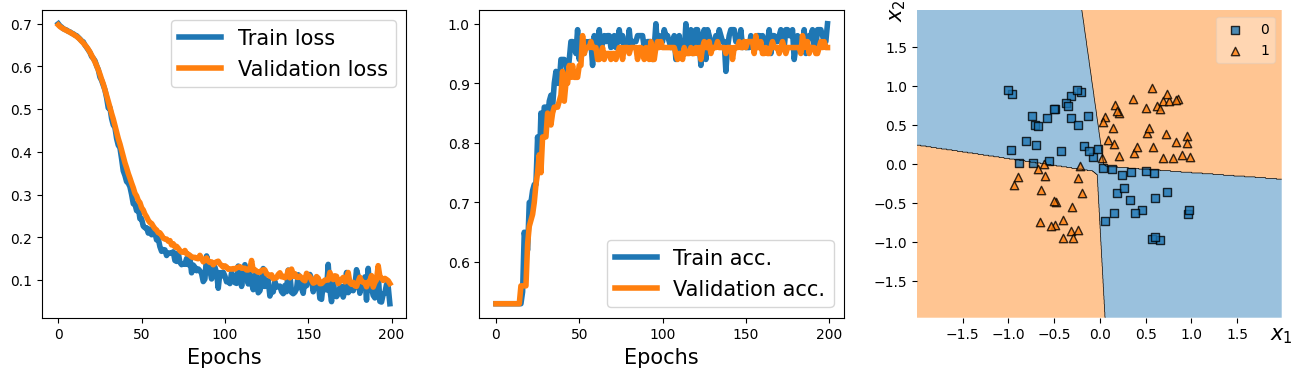

In [79]:
# plot
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(loss_hist_train, lw=4)
plt.plot(loss_hist_val, lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(accuracy_hist_train, lw=4)
plt.plot(accuracy_hist_val, lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(), 
                      y=y_valid.numpy().astype(np.int64),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)

plt.show()